In [1]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv(r'C:\Users\Public\titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic = titanic.drop('Cabin', axis=1)

In [7]:
# Impute mean age
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

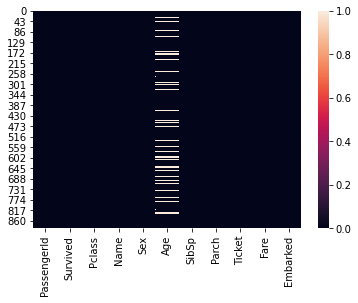

In [8]:
sns.heatmap(titanic.isnull())

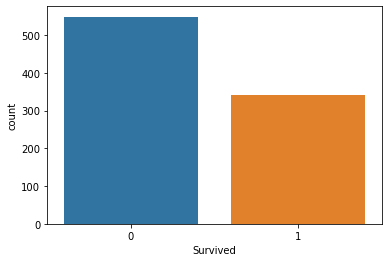

In [9]:
sns.countplot(x='Survived',data=titanic)

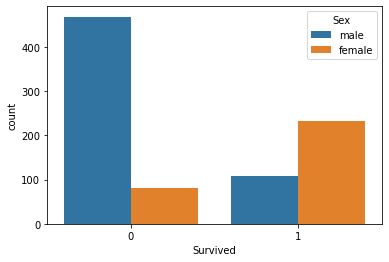

In [10]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

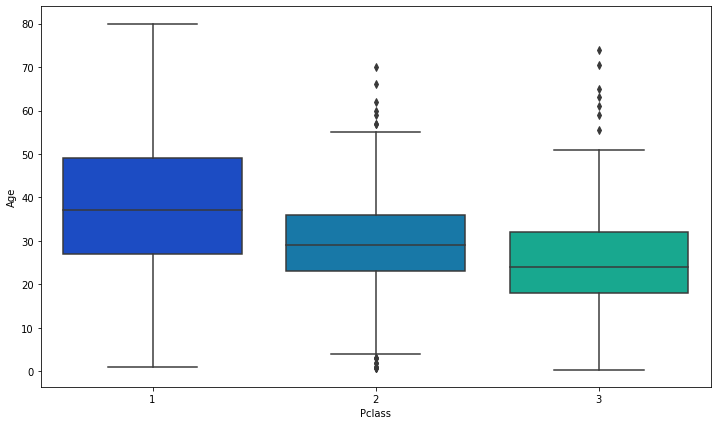

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

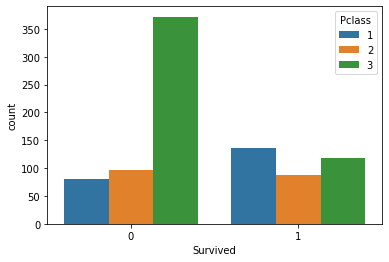

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [13]:
titanic.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if 'Pclass'==1:
            return 38
        elif 'Pclass'==2:
            return 30
        else:
            return 25
    else: 
        return Age

In [15]:
#Dummy Variables

pd.get_dummies(titanic['Sex'], drop_first=True)


# embarked = pd.get_dummies()

sex = pd.get_dummies(titanic['Sex'],drop_first=True)

embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [16]:
titanic = pd.concat([titanic, sex, embark],axis=1)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [17]:
titanic['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [18]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

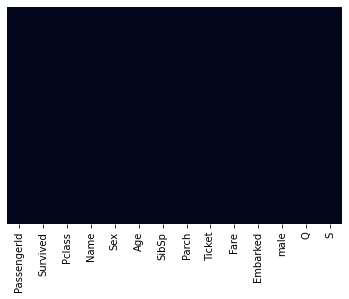

In [19]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [21]:
#titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

In [24]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
520,521,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,S,0,0,1,0,0,1
510,511,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,1,1,0,1,1,0
446,447,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,S,0,0,1,0,0,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
691,692,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,C,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,576,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S,1,0,1,1,0,1
838,839,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,S,1,0,1,1,0,1
337,338,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,C,0,0,0,0,0,0
523,524,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,C,0,0,0,0,0,0


In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

ValueError: could not convert string to float: 'S'

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined

In [28]:
from category_encoders import TargetEncoder

In [29]:
data = pd.read_csv(r'C:\Users\Public\titanic_train.csv')
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df = data.copy()

# Drop Cabin entirely
df.drop('Cabin', axis=1, inplace=True)

# Embarked - drop rows with missing values
df = df.dropna(subset=['Embarked'])

# Age - Impute median value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

df['Age'] = imputer.fit_transform(df[['Age']])

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

df['Age'] = imputer.fit_transform(df[['Age']])

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [33]:
df.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [34]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder_sex = LabelEncoder()

sex_label = label_encoder_sex.fit_transform(titanic['Sex'])
sex_label

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [35]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

sex_onehot = onehot_encoder.fit_transform(titanic[['Sex']])
sex_onehot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [36]:
# Target Encoding
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()

titanic['sex_target'] = target_encoder.fit_transform(titanic['Sex'], titanic['Survived'])
titanic[['Sex', 'sex_target']]

,Sex,sex_target
0,male,0.188908
1,female,0.742038
2,female,0.742038
3,female,0.742038
4,male,0.188908
...,...,...
886,male,0.188908
887,female,0.742038
888,female,0.742038
889,male,0.188908


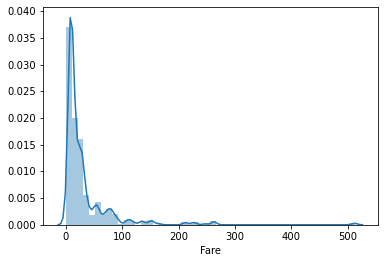

In [37]:
fare = df['Fare']
sns.distplot(fare)

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [39]:
# Replace with dummy variables
sex = pd.get_dummies(titanic['Sex'])
embark = pd.get_dummies(titanic['Embarked'])

In [40]:
from scipy.stats import skew
skew(fare)

4.793334993307843

In [41]:
fare - 1


0       6.2500
1      70.2833
2       6.9250
3      52.1000
4       7.0500
        ...   
886    12.0000
887    29.0000
888    22.4500
889    29.0000
890     6.7500
Name: Fare, Length: 889, dtype: float64

In [42]:
np.log(10)

2.302585092994046

In [43]:
#log transform the Data

log_fare = np.log(fare)
skew_log = skew(log_fare)

C:\Anaconda\envs\IOD - Course Enviroment 38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda\envs\IOD - Course Enviroment 38\lib\site-packages\scipy\stats\stats.py:1082: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


In [44]:
# Square root transform the Date

sqrt_fare = np.sqrt(fare)
skew_sqrt = skew(sqrt_fare)

skew_fare = skew(fare)

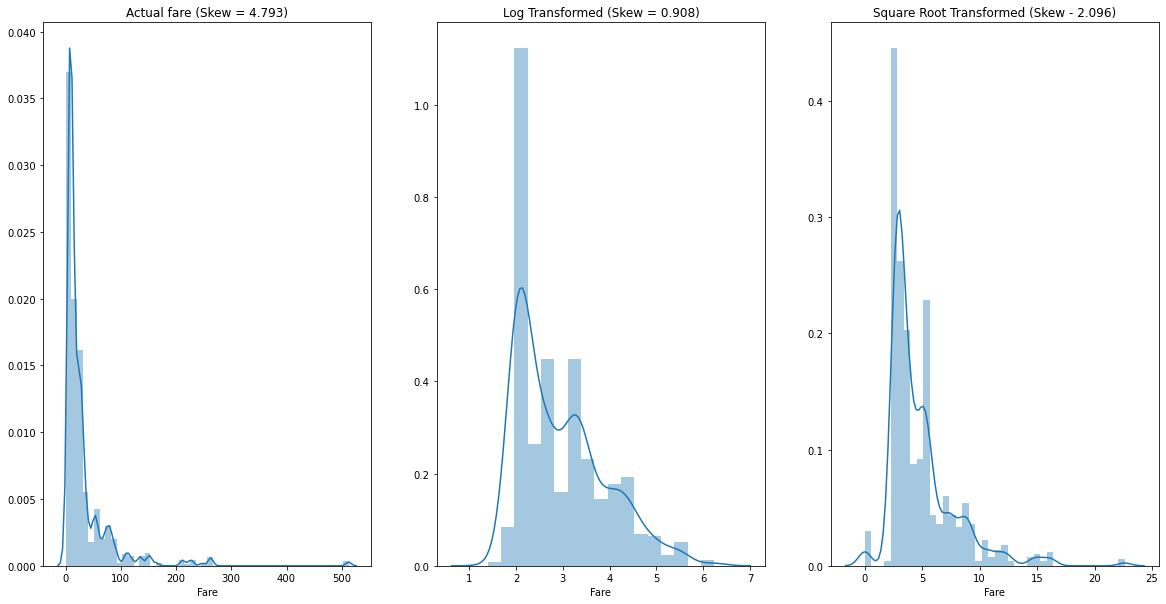

In [45]:

log_fare = np.log(fare[fare > 0])
skew_log = skew(log_fare)

sqrt_fare = np.sqrt(fare)
skew_sqrt = skew(sqrt_fare)

skew_fare = skew(fare)

fig, ax = plt.subplots(1, 3, figsize=(20,10))

sns.distplot(fare, ax=ax[0])
ax[0].set_title('Actual fare (Skew = %.3f)'%skew_fare)

sns.distplot(log_fare, ax=ax[1])
ax[1].set_title('Log Transformed (Skew = %.3f)'%skew_log)

sns.distplot(sqrt_fare, ax=ax[2])
ax[2].set_title('Square Root Transformed (Skew - %.3f)'%skew_sqrt)

plt.show()

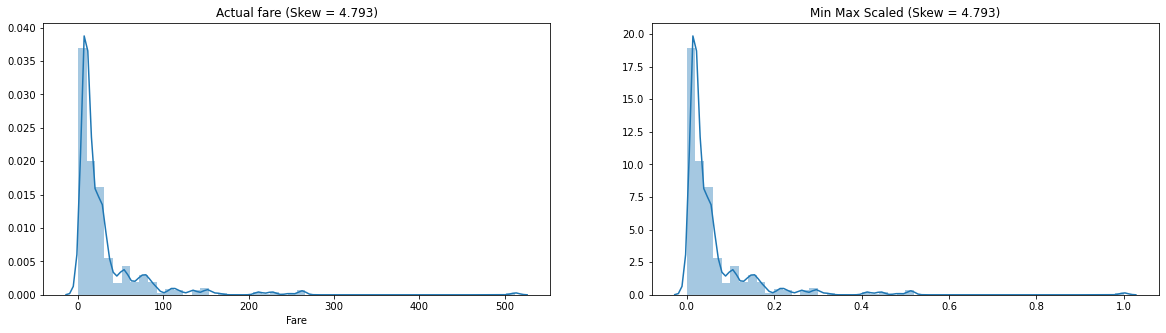

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_fare = scaler.fit_transform(df[['Fare']])
skew_scaled = skew(scaled_fare)

fig, ax = plt.subplots(1, 2, figsize = (20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title('Actual fare (Skew = %.3f)'%skew_fare)

sns.distplot(scaled_fare, ax=ax[1])
ax[1].set_title('Min Max Scaled (Skew = %.3f)'%skew_scaled)
plt.show()

In [47]:
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(115)

qt = QuantileTransformer(n_quantiles=500, output_distribution = 'normal',
                        random_state=rng)

qt.fit_transform(df[['Fare']])

array([[-1.36470849e+00],
       [ 1.20715411e+00],
       [-6.41739890e-01],
       [ 1.00140041e+00],
       [-5.37123420e-01],
       [-4.43481596e-01],
       [ 9.37118911e-01],
       [ 2.48681430e-01],
       [-2.25431914e-01],
       [ 6.42447158e-01],
       [ 1.43656728e-01],
       [ 4.91254449e-01],
       [-5.37123420e-01],
       [ 6.95129821e-01],
       [-8.76494025e-01],
       [ 1.13071221e-01],
       [ 6.02120111e-01],
       [-1.08211837e-01],
       [ 1.58900210e-01],
       [-1.59720310e+00],
       [ 3.94263140e-01],
       [-1.08211837e-01],
       [-6.06389667e-01],
       [ 7.80885673e-01],
       [ 2.48681430e-01],
       [ 7.14448485e-01],
       [-1.59720310e+00],
       [ 2.57513696e+00],
       [-8.25976125e-01],
       [-7.60603736e-01],
       [ 5.34224280e-01],
       [ 1.83777401e+00],
       [-1.08809515e+00],
       [-2.66857139e-01],
       [ 1.40399398e+00],
       [ 9.60759022e-01],
       [-1.52904816e+00],
       [-5.37123420e-01],
       [ 1.5

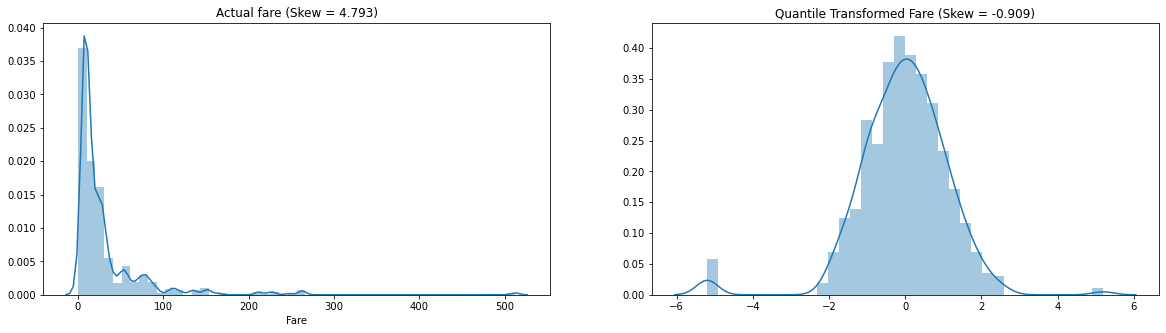

In [48]:
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(115)

qt = QuantileTransformer(n_quantiles = 500, output_distribution = 'normal', random_state = rng)

qt_fare = qt.fit_transform(titanic[['Fare']])
skew_qt = skew(qt_fare)

fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare (Skew = %.3f)"%skew_fare)

sns.distplot(qt_fare, ax=ax[1])
ax[1].set_title("Quantile Transformed Fare (Skew = %.3f)"%skew_qt)

plt.show()